# Task 25-> Logistic Regression from scratch
Logistic Regression is a statistical method for binary classification that models the probability of a binary outcome based on one or more predictor variables. Unlike linear regression, logistic regression outputs probabilities that map to a binary decision through the logistic (sigmoid) function. 

## Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve

## Load dataset


In [2]:
df = pd.read_csv('formula1.csv')
df.head()

,Unnamed: 0,name,country,team,races,years_in_f1,championships,gp_wins,podiums,poles,dnfs,fav_circuit,avg_yearly_salary
0,0,Frank Daniels,United States,Mercedes,67,4,5,56,29,62,16,Albert Park,16
1,1,Pierangelo Franceschi,Italy,Aston Martin,218,10,3,75,43,55,9,Circuit Zandvoort,17
2,2,Frederick Gamble,United States,Ferrari,167,8,3,56,52,72,11,Imola,14
3,3,Tristan Rousseau-Grondin,France,AlphaTauri,251,12,4,68,37,70,16,Circuit of The Americas,14
4,4,Horacio Alemany,Spain,Aston Martin,185,9,1,73,37,66,11,Jeddah Corniche Circuit,14


## Check for missing values


In [3]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Unnamed: 0           0
name                 0
country              0
team                 0
races                0
years_in_f1          0
championships        0
gp_wins              0
podiums              0
poles                0
dnfs                 0
fav_circuit          0
avg_yearly_salary    0
dtype: int64


# Data preprocessing
## Select relevant features and target


In [4]:
X = df[['races', 'years_in_f1', 'championships', 'gp_wins', 'podiums', 'poles', 'dnfs', 'avg_yearly_salary']].values
y = (df['team'] == 'Mercedes').astype(int).values  # Binary classification: Mercedes vs. others

## Split the data into training and test sets


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sigmoid function
The logistic function (or sigmoid function) is defined as:

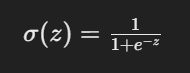<br>
where z is a linear combination of the input features. This function maps any real-valued number into the range (0, 1), which is interpreted as the probability of the target variable being in the positive class.

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Initialize parameters


In [8]:
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Compute cost and gradients with L2 regularization
## 1. Cost Function
To train the logistic regression model, we need a cost function that measures how well the model's predictions match the actual data. The cost function commonly used is the cross-entropy loss:<br>
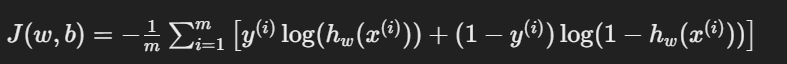<br>
where:
m is the number of training examples,

y(i) is the true label for the i-th example,

hw(x (i)) is the predicted probability for the i-th example.

<br><br>
## 2. Regularization
To prevent overfitting, regularization can be added to the cost function:

### L2 Regularization (Ridge): 
Adds a penalty equal to the square of the magnitude of the coefficients.<br><br>
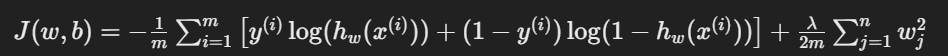<br><br>
### L1 Regularization (Lasso): 
Adds a penalty equal to the absolute value of the magnitude of the coefficients.<br><br>
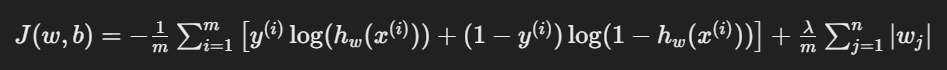<br><br>
Regularization helps to prevent overfitting by constraining the magnitude of the model parameters.

In [9]:
def propagate(w, b, X, y, lambda_):
    m = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)
    cost = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A)) + (lambda_/(2*m)) * np.sum(np.square(w))
    
    dw = (1/m) * np.dot(X.T, (A - y)) + (lambda_/m) * w
    db = (1/m) * np.sum(A - y)
    
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    
    return grads, cost

# Optimization with Gradient Descent
To minimize the cost function, we use gradient descent, an iterative optimization algorithm. The gradients of the cost function with respect to the model parameters w and b are computed and used to update the parameters:<br><br>
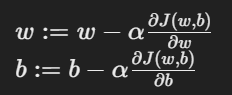<br><br>
where α is the learning rate, and the partial derivatives (gradients) are given by:<br><br>
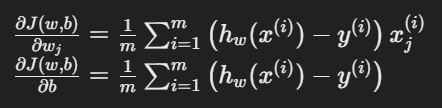


In [10]:
def optimize(w, b, X, y, num_iterations, learning_rate, lambda_, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, y, lambda_)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    parameters = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return parameters, grads, costs

## Prediction


In [11]:
def predict(w, b, X):
    m = X.shape[0]
    y_prediction = np.zeros((m, 1))
    A = sigmoid(np.dot(X, w) + b)
    
    for i in range(A.shape[0]):
        y_prediction[i] = 1 if A[i] > 0.5 else 0
    
    return y_prediction

# The Logistic Regression Model
In logistic regression, the probability P(y=1∣x) is modeled using the logistic function applied to a linear combination of the input features 

### P(y=1∣x)=σ(w⋅x+b)

where:

w is the vector of weights,

x is the vector of input features,

b is the bias term.

In [12]:
def logistic_regression(X_train, y_train, X_test, y_test, num_iterations, learning_rate, lambda_):
    w, b = initialize_parameters(X_train.shape[1])
    
    parameters, grads, costs = optimize(w, b, X_train, y_train.reshape(-1, 1), num_iterations, learning_rate, lambda_, print_cost=True)
    
    w = parameters["w"]
    b = parameters["b"]
    
    y_prediction_test = predict(w, b, X_test)
    y_prediction_train = predict(w, b, X_train)
    
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train.reshape(-1, 1))) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test.reshape(-1, 1))) * 100))
    
    return parameters, costs

## Training the model with regularization


In [13]:
parameters, costs = logistic_regression(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.01, lambda_=0.1)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5035442681085156
Cost after iteration 200: 0.38589992831862596
Cost after iteration 300: 0.309630841866906
Cost after iteration 400: 0.25775969804166116
Cost after iteration 500: 0.2209102621689544
Cost after iteration 600: 0.19373712585330946
Cost after iteration 700: 0.17306153623540674
Cost after iteration 800: 0.1569112656760876
Cost after iteration 900: 0.1440138426009158
Cost after iteration 1000: 0.13351910870411338
Cost after iteration 1100: 0.12484131179643626
Cost after iteration 1200: 0.11756581423067688
Cost after iteration 1300: 0.1113920417070976
Cost after iteration 1400: 0.10609748360527345
Cost after iteration 1500: 0.10151432540723099
Cost after iteration 1600: 0.09751388944207667
Cost after iteration 1700: 0.09399603429062471
Cost after iteration 1800: 0.09088178133967802
Cost after iteration 1900: 0.0881080889211454
Train accuracy: 99.0 %
Test accuracy: 98.66666666666667 %


# Plot the cost function over iterations


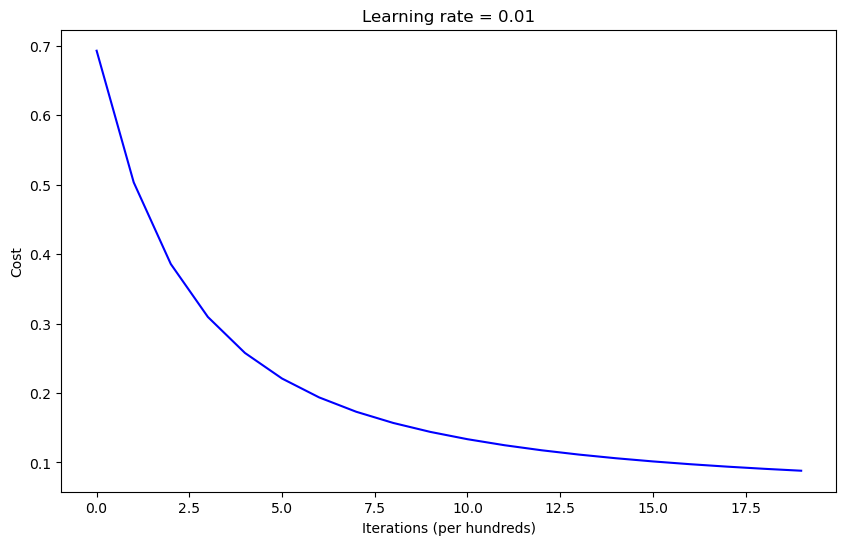

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(costs, color='blue')
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Learning rate = 0.01')
plt.show()

This plot shows how the cost function changes over iterations of gradient descent.It helps to visualize the convergence of the optimization algorithm. A decreasing cost function indicates that the model is learning and improving.

## Plot histograms of features


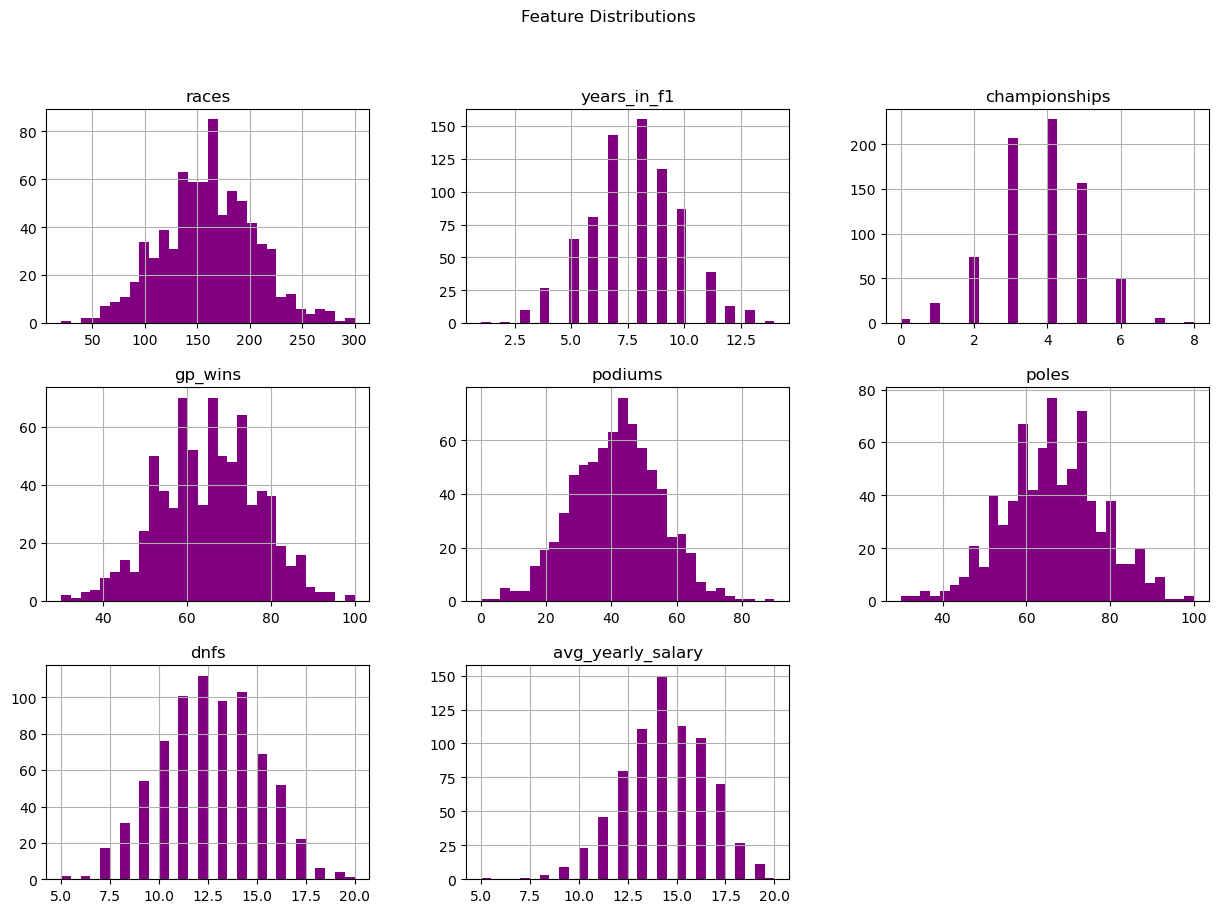

In [15]:
df[['races', 'years_in_f1', 'championships', 'gp_wins', 'podiums', 'poles', 'dnfs', 'avg_yearly_salary']].hist(bins=30, figsize=(15, 10), color='purple')
plt.suptitle('Feature Distributions')
plt.show()

## Plot correlation matrix


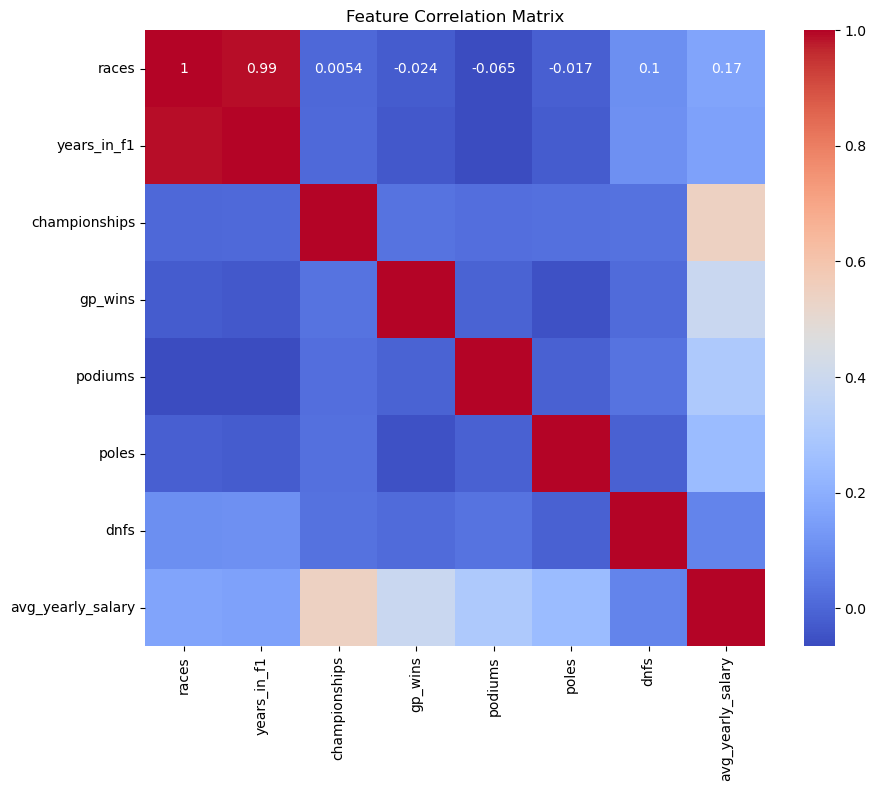

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['races', 'years_in_f1', 'championships', 'gp_wins', 'podiums', 'poles', 'dnfs', 'avg_yearly_salary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## ROC Curve Function


In [17]:
def plot_roc_curve(y_test, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Precision-Recall Curve Function


In [18]:
def plot_precision_recall_curve(y_test, y_prob):
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

## Compute probabilities for ROC and Precision-Recall curves


In [19]:
y_prob_train = sigmoid(np.dot(X_train, parameters["w"]) + parameters["b"])
y_prob_test = sigmoid(np.dot(X_test, parameters["w"]) + parameters["b"])

## Plot ROC curve

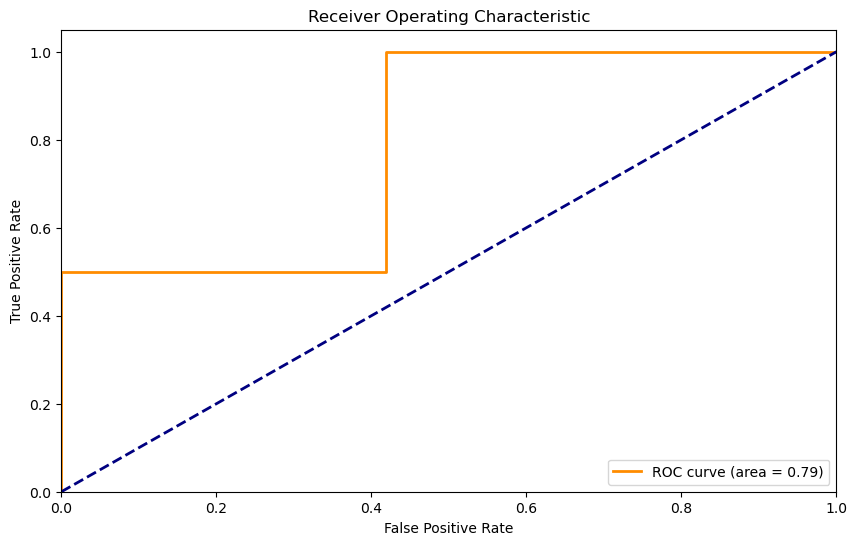

In [20]:
plot_roc_curve(y_test, y_prob_test)

The Receiver Operating Characteristic (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.It helps to evaluate the performance of the classification model at different thresholds. The area under the ROC curve (AUC) is a measure of the model’s ability to distinguish between classes.

## Plot Precision-Recall curve


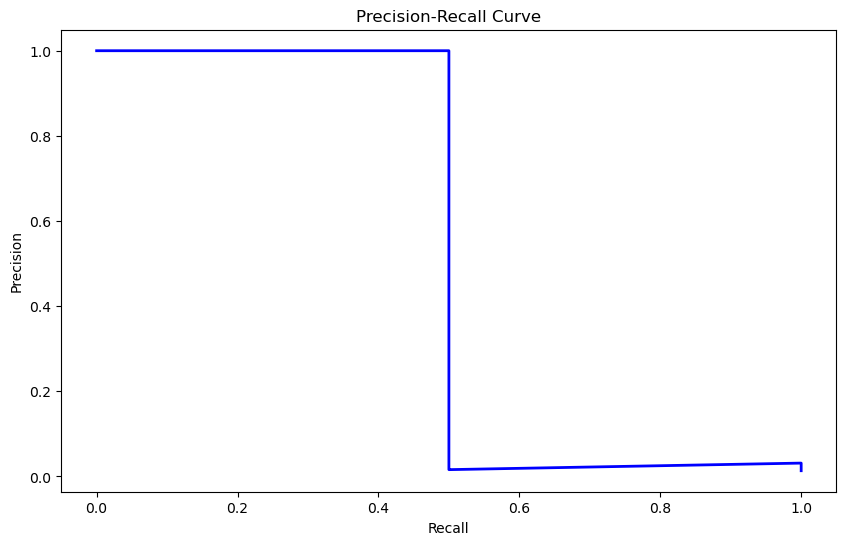

In [21]:
plot_precision_recall_curve(y_test, y_prob_test)

This plot shows the precision (positive predictive value) against recall (sensitivity) for different threshold values.It helps to understand the trade-off between precision and recall for different thresholds and is particularly useful for imbalanced datasets.

## Feature importance (weights)


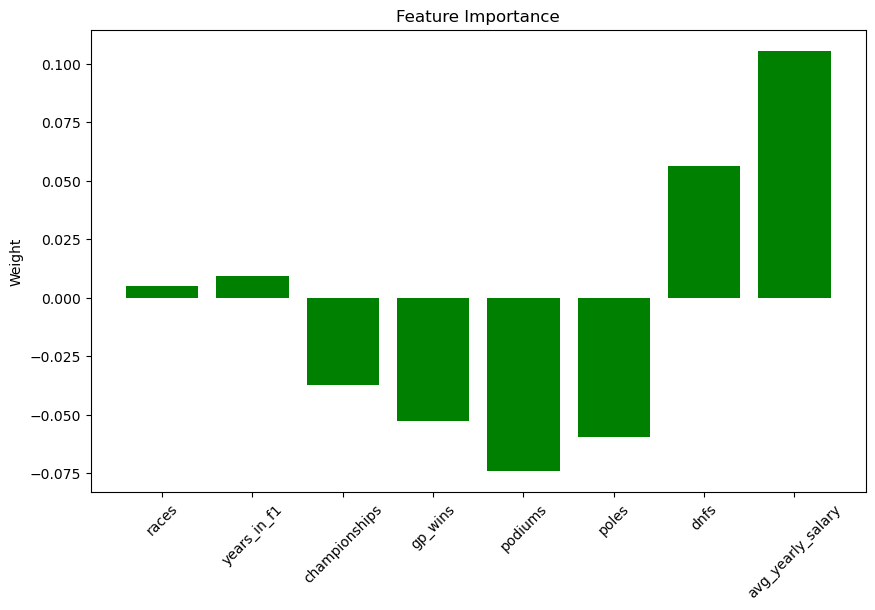

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(parameters["w"])), parameters["w"].flatten(), color='green')
plt.xticks(range(len(parameters["w"])), ['races', 'years_in_f1', 'championships', 'gp_wins', 'podiums', 'poles', 'dnfs', 'avg_yearly_salary'], rotation=45)
plt.ylabel('Weight')
plt.title('Feature Importance')
plt.show()

In this plot features dnfs and avg_yearly_salary has more importance than other features.

# Conclusion
Logistic regression is a powerful and interpretable classification algorithm. By implementing it from scratch, you gain a deeper understanding of the underlying mechanics and the optimization process. This knowledge is essential for appreciating more complex machine learning models and for debugging and improving your models effectively.